In [1]:
# Installation
! pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 42.5 MB/s eta 0:00:00


In [2]:
# import torch
# from torch.autograd import Variable
import pennylane as qml
from pennylane import numpy as np

In [3]:
# Transverse-Field Ising Model
ising_data= qml.data.load("qspin", sysname="Ising", periodicity="open", layout="1x16")[0]

In [4]:
ising_data.spin_system['order_params']

'The order parameter is the magnetization in the Z direction, defined by \\langle M_z \rangle =\\langle |\\sum_i \\sigma_i^z|\rangle'

In [5]:
# Order parameters --  is the magnetization in the Z direction, defined by \\langle M_z \rangle =\\langle |\\sum_i \\sigma_i^z|\rangle
M = ising_data.order_params

In [6]:
# Check whether we have a phase transition
if ising_data.num_phases >= 2:
  print("It makes sense to identify the pahse transition")

It makes sense to identify the pahse transition


In [7]:
# Parameters of the Ising model
J, h = ising_data.parameters['J'], ising_data.parameters['h'],

In [8]:
# Hamiltonians
Hmas = ising_data.hamiltonians

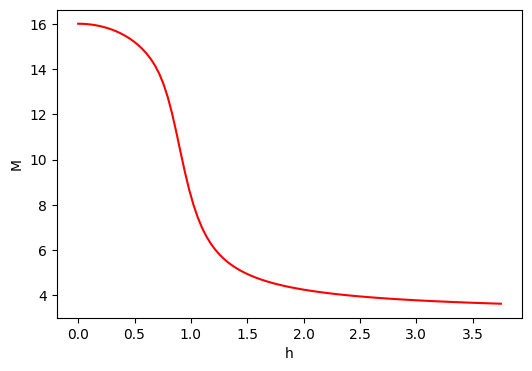

In [9]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))

# Enable processing the Torch trainable tensors
plt.plot(h, M, 'r')
plt.xlabel("h")
plt.ylabel("M")
    # plt.legend()
plt.show()

In [41]:
def cost(m_i, m_j, h_i, h_j):
    # The cost fucntion i s the susceptibility xi = (m_i-m_i-1)/((h_i-h_i-1))
    xi = np.abs(m_i-m_j)/np.abs(h_i-h_j)
    return xi

In [63]:
h_c = np.array([h[0]])
xi_c = 0
for i in range (len(M)-1):
  xi_i = cost(M[i+1], M[i], h[i+1], h[i])
  if(xi_i > xi_c):
    xi_c, h_c  = xi_i, h[i]
print("Phase transition at h ", h_c)

Phase transition at h  0.8712121212121212


In [11]:
"""
 Looking for a phase transition: Let's choose h_c is a point where the phase trnasition takes place as h[0]
"""
# h_c = np.array([h[0]], requires_grad=True)
#h_c = np.tensor_wrapper(np.array([h[0]], requires_grad=True))

In [12]:
# # Optimiser
# opt = qml.GradientDescentOptimizer(stepsize=0.1)

In [64]:
# n_it = 300
# for it in range (n_it):
#   h_c, prev_cost = opt.step_and_cost(cost(M[1], M[0], h[1], h[0]), h_c)
#   #h_c, prev_cost = opt.step_and_cost(cost_func, h_c):
#   # h_c = h_c - 0.05*grad_poly(h_c)
#   if it %10 ==0:
#     print('Critical point: ', h_c)

In [65]:
import pennylane as qml

chain_layouts = ["1x16", "1x8", "1x4"] #"2x2", "2x4", "2x8", "4x4", "all"

chain_datasets = [ qml.data.load("qspin", sysname="Ising", periodicity="open", lattice="chain", layout=l) for l in chain_layouts ]

In [66]:
import pandas as pd

def panda_dataframe(datasets):
  """
  Parameters:
  datasets : List of qml.data.load outputs
  """
  column_names = ["order_params", "h", "num_phases"]
  identifier_columns = list(datasets[0][0].identifiers.keys())
  column_names.extend(identifier_columns)
  df = pd.DataFrame(columns = column_names)

  for dataset in datasets:
    data = dataset[0]
    for order_param, h in zip(data.order_params, data.parameters["h"]):
      row = {
          "order_params": np.abs(order_param),
          "h" : h,
          "num_phases": data.num_phases
      }
      row = row | data.identifiers
      df = df.append(row,ignore_index=True)

  return df

In [67]:
import matplotlib.pyplot as plt
import numpy as np

def plot_datasets(datasets,legend_keys,image_name):
  """
  Parameters:
  datasets : List of qml.data.load outputs
  image_name : Name of the image to save with
  legend_keys : Labels to discrimate datasets, must be list of identifiers.
                Identifiers are one of the following strings ->
                "layout","sysname","periodicity","lattice"
  """
  fig, ax = plt.subplots(figsize=(6, 6))

  ax.set_title("Plot of h vs order_params")
  ax.set_xlabel("h")
  ax.set_ylabel("M_Z")

  for dataset in datasets:
    data = dataset[0]
    labels = {k: data.identifiers[k] for k in legend_keys}
    ax.scatter(data.parameters["h"],np.abs(data.order_params), label = str(labels))

  ax.legend()
  fig.savefig(f"{image_name}.png")

In [68]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [69]:
panda_dataframe(chain_datasets).head()

,order_params,h,num_phases,sysname,periodicity,lattice,layout
0,16.000000,0.000000,2,Ising,open,chain,1x16
1,15.996051,0.037879,2,Ising,open,chain,1x16
2,15.984165,0.075758,2,Ising,open,chain,1x16
3,15.964225,0.113636,2,Ising,open,chain,1x16
4,15.936031,0.151515,2,Ising,open,chain,1x16


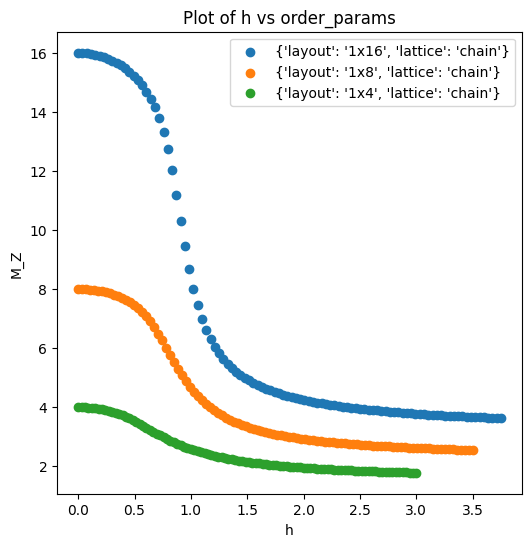

In [70]:
plot_datasets(chain_datasets,["layout","lattice"],"test")

In [91]:
M_16, M_8, M_4 = chain_datasets[0][0].order_params, chain_datasets[1][0].order_params, chain_datasets[2][0].order_params,
#panda_dataframe(chain_datasets).head()

In [93]:
h_16, h_8, h_4 = chain_datasets[0][0].parameters['h'], chain_datasets[1][0].parameters['h'], chain_datasets[2][0].parameters['h'],

In [95]:
h_c_16, h_c_8, h_c_4 = np.array([h_16[0]]), np.array([h_8[0]]), np.array([h_4[0]])
xi_c_16, xi_c_8, xi_c_4, = 0, 0, 0
for i in range (len(M_16)-1):
  xi_i_16 = cost(M_16[i+1], M_16[i], h_16[i+1], h_16[i])
  xi_i_8 = cost(M_8[i+1], M_8[i], h_8[i+1], h_8[i])
  xi_i_4 = cost(M_4[i+1], M_4[i], h_4[i+1], h_4[i])
  if(xi_i_16 > xi_c_16):
    xi_c_16, h_c_16  = xi_i_16, h_16[i]
  if(xi_i_8 > xi_c_8):
    xi_c_8, h_c_8  = xi_i_8, h_8[i]
  if(xi_i_4 > xi_c_4):
    xi_c_4, h_c_4  = xi_i_4, h_4[i]
print("Phase transition at h ", h_c_16, "for layout", chain_layouts[0])
print("Phase transition at h ", h_c_8, "for layout", chain_layouts[1])
print("Phase transition at h ", h_c_4, "for layout", chain_layouts[2])

Phase transition at h  0.8712121212121212 for layout 1x16
Phase transition at h  0.7777777777777778 for layout 1x8
Phase transition at h  0.6060606060606061 for layout 1x4
